1. file upload

In [2]:
#colab에서 openCV 사용하기
#haar-cascade 알고리즘을 이용한 동영상 처리

#1. file upload
from google.colab import files
upload_file = files.upload()

Saving haarcascade_eye_tree_eyeglasses.xml to haarcascade_eye_tree_eyeglasses.xml
Saving haarcascade_frontalface_alt.xml to haarcascade_frontalface_alt.xml
Saving obama_01.mp4 to obama_01.mp4


2. load file

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

import tensorflow as tf
import IPython

print("OpenCV version: ", cv2.__version__)

OpenCV version:  4.1.2


In [10]:
!ls -al

total 10140
drwxr-xr-x 1 root root    4096 May 27 23:06 .
drwxr-xr-x 1 root root    4096 May 27 22:59 ..
drwxr-xr-x 4 root root    4096 May  6 13:43 .config
-rw-r--r-- 1 root root  601661 May 27 23:06 haarcascade_eye_tree_eyeglasses.xml
-rw-r--r-- 1 root root  676709 May 27 23:06 haarcascade_frontalface_alt.xml
-rw-r--r-- 1 root root 9083585 May 27 23:07 obama_01.mp4
drwxr-xr-x 1 root root    4096 May  6 13:44 sample_data


In [11]:
file_name = 'obama_01.mp4'
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

In [12]:
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
  print('--(!)error loading face cascade')
  exit(0)

if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
  print('--(!)error loading eyes cascade')
  exit(0)

In [13]:
def detectAndDisplay(frame):
  IPython.display.clear_output(wait=True)
  frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  frame_gray = cv2.equalizeHist(frame_gray)
  # detect face
  faces = face_cascade.detectMultiScale(frame_gray)
  for (x,y,w,h) in faces:
    frame = cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 3)
    faceROI = frame_gray[y:y+h, x:x+w]
    #detect eyes
    eyes = eyes_cascade.detectMultiScale(faceROI)
    for (x2, y2, w2, h2) in eyes:
      eye_center = (x+x2+w2//2, y+y2+h2//2)
      radius = int(round((w2+h2)*0.25))
      frame = cv2.circle(frame, eye_center, radius, (0, 0, 255), 3)
    
    cv2_imshow(frame)

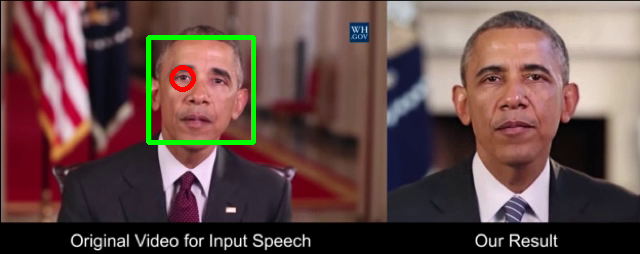

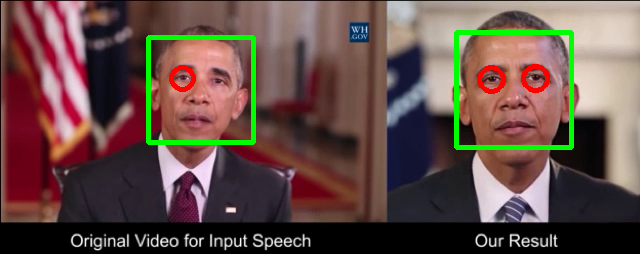

In [ ]:
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
  print('opening video capture')
  exit(0)

while True:
  re, frame = cap.read()
  if frame is None:
    print('captured frame - break')
    break
  detectAndDisplay(frame)